In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
data = pd.read_csv('dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
genre_id            0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_id
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,56.499925
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,32.907978
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,28.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,56.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,85.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000


In [7]:
data['popularity_flag'] = 0
data.loc[data['popularity'] > 50, 'popularity_flag'] = 1

In [8]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genre_id,popularity_flag
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0,1


In [9]:
data_art = data.groupby(['artists']).size()
data_art = data_art.to_frame()
data_art.sort_values(by=[0], ascending=False)

,0
artists,
The Beatles,279
George Jones,271
Stevie Wonder,236
Linkin Park,224
Ella Fitzgerald,222
...,...
Mother Love Bone,1
DubVision;Afrojack,1
Dub Pistols;Too Many T's,1


In [10]:
data_gen = data.groupby(['track_genre']).size()
data_gen = data_gen.to_frame()
data_gen.sort_values(by=[0], ascending=False)

,0
track_genre,
acoustic,1000
afrobeat,1000
psych-rock,1000
progressive-house,1000
power-pop,1000
...,...
emo,1000
electronic,1000
electro,1000


In [11]:
data_art.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31437 entries, !nvite to 龍藏Ryuzo
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       31437 non-null  int64
dtypes: int64(1)
memory usage: 491.2+ KB


In [12]:
data2 = data.drop(['Unnamed: 0', 'track_id','artists','album_name','track_name','popularity'], axis=1)

In [13]:
pop_corr = data2[data2.columns[1:]].corr()['popularity_flag'][:-1]

C:\Users\tomas\AppData\Local\Temp\ipykernel_16736\2859699111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pop_corr = data2[data2.columns[1:]].corr()['popularity_flag'][:-1]


In [14]:
ts_list = pop_corr.values.tolist()

In [15]:
ts_list_abs =  [abs(ele) for ele in ts_list]

In [16]:
def Average(lst):
    return sum(lst) / len(lst)

average = Average(ts_list_abs)
average

0.03819828925358198

In [17]:
pop_corr_df = pop_corr.to_frame()
pop_corr_df

,popularity_flag
explicit,0.057928
danceability,0.052040
energy,-0.022273
key,-0.001432
loudness,0.034286
mode,-0.026229
speechiness,-0.049383
acousticness,-0.035401
instrumentalness,-0.081801
liveness,-0.086908


In [18]:
pop_corr_df['pop_flag_abs'] = abs(pop_corr_df['popularity_flag'])

In [19]:
pop_corr_abv = pop_corr_df[(pop_corr_df['pop_flag_abs']>average)]
pop_corr_abv = pop_corr_abv.sort_values(by=['pop_flag_abs'], ascending=False)
pop_corr_abv

,popularity_flag,pop_flag_abs
liveness,-0.086908,0.086908
instrumentalness,-0.081801,0.081801
explicit,0.057928,0.057928
danceability,0.052040,0.052040
speechiness,-0.049383,0.049383
valence,-0.040239,0.040239


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113999 non-null  int64  
 1   explicit          113999 non-null  bool   
 2   danceability      113999 non-null  float64
 3   energy            113999 non-null  float64
 4   key               113999 non-null  int64  
 5   loudness          113999 non-null  float64
 6   mode              113999 non-null  int64  
 7   speechiness       113999 non-null  float64
 8   acousticness      113999 non-null  float64
 9   instrumentalness  113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  time_signature    113999 non-null  int64  
 14  track_genre       113999 non-null  object 
 15  genre_id          113999 non-null  int64  
 16  popularity_flag   11

In [21]:
dummies_var = ["explicit","track_genre"]
data3 = pd.get_dummies(data2, prefix=dummies_var, columns=dummies_var, drop_first=True )
data3.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0,0,0,0,0,0,0,0,0,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0,0,0,0,0,0,0,0,0,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0,0,0,0,0,0,0,0,0,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0,0,0,0,0,0,0,0,0,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Putting feature variable to X
X = data3.drop(['popularity_flag'],axis=1)

# Putting response variable to y
y = data3['popularity_flag']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=12345)
X_train.shape, X_test.shape

((96899, 128), (17100, 128))

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

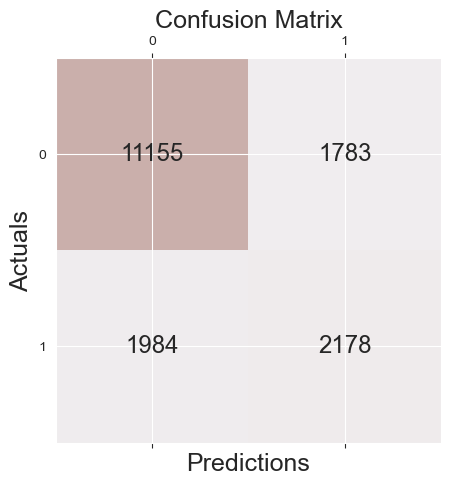

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


y_train_preddt = dt.predict(X_train)
y_test_preddt = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_preddt)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [28]:
conf_matrix

array([[11155,  1783],
       [ 1984,  2178]], dtype=int64)

In [29]:
print("Accuracy: ", (conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[0,1]+conf_matrix[1,0]) )
print("Precision: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[0,1]) )
print("Recall: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[1,0]) )

Accuracy:  0.7797076023391812
Precision:  0.862188900912042
Recall:  0.8489991627977777


In [30]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

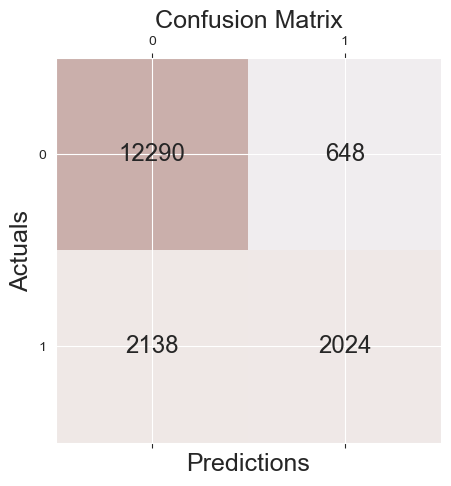

In [31]:
y_train_predrf = rf.predict(X_train)
y_test_predrf = rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_test_predrf)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rf[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
print("Accuracy: ", (conf_matrix_rf[0,0]+conf_matrix_rf[1,1])/(conf_matrix_rf[0,0]+conf_matrix_rf[1,1]+conf_matrix_rf[0,1]+conf_matrix_rf[1,0]) )
print("Precision: ", (conf_matrix_rf[0,0])/(conf_matrix_rf[0,0]+conf_matrix_rf[0,1]) )
print("Recall: ", (conf_matrix_rf[0,0])/(conf_matrix_rf[0,0]+conf_matrix_rf[1,0]) )

Accuracy:  0.8370760233918129
Precision:  0.9499149791312413
Recall:  0.8518159135015249


In [33]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=1000, seed = 123)

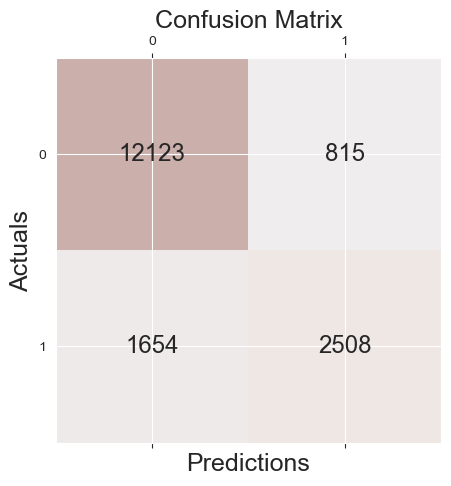

In [34]:
xgb.fit(X_train, y_train)
y_train_predxgb = xgb.predict(X_train)
y_test_predxgb = xgb.predict(X_test)

conf_matrix_xgb = confusion_matrix(y_true=y_test, y_pred=y_test_predxgb)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_xgb, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_xgb.shape[0]):
    for j in range(conf_matrix_xgb.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_xgb[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [35]:
print("Accuracy: ", (conf_matrix_xgb[0,0]+conf_matrix_xgb[1,1])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[1,1]+conf_matrix_xgb[0,1]+conf_matrix_xgb[1,0]) )
print("Precision: ", (conf_matrix_xgb[0,0])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[0,1]) )
print("Recall: ", (conf_matrix_xgb[0,0])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[1,0]) )

Accuracy:  0.8556140350877193
Precision:  0.9370072654196939
Recall:  0.8799448355955578


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [80, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,3, 5],
    'min_samples_split': [2, 8, 10],
    'n_estimators': [100, 500,1000]
}
# Create a based model
rf_0 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_0, param_grid = param_grid, scoring = 'recall')

In [40]:
grid_search.fit(X_train, y_train)

C:\Users\tomas\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tomas\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tomas\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

KeyboardInterrupt: 

In [38]:
print ('Best Parameters: ', grid_search.best_params_, ' \n')
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf2=RandomForestClassifier(n_estimators=1000, max_depth = 100, max_features = 'sqrt', min_samples_leaf =1,min_samples_split =2)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf2.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
y_train_predrf2 = rf2.predict(X_train)
y_test_predrf2 = rf2.predict(X_test)

conf_matrix_rf2 = confusion_matrix(y_true=y_test, y_pred=y_test_predrf2)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_rf2.shape[0]):
    for j in range(conf_matrix_rf2.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rf2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("Accuracy: ", (conf_matrix_rf2[0,0]+conf_matrix_rf2[1,1])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[1,1]+conf_matrix_rf2[0,1]+conf_matrix_rf2[1,0]) )
print("Precision: ", (conf_matrix_rf2[0,0])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[0,1]) )
print("Recall: ", (conf_matrix_rf2[0,0])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[1,0]) )

In [ ]:
#Feature Importance

feature_names = X.columns
target_names = data3['popularity_flag'].astype('category').unique().tolist()

importances = rf2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=12)
plt.xlabel('Relative Importance')
plt.show()